# Note: Refresh notebook after updating the parameters in inputs.

In [12]:
import pybamm # loads pybamm package
import matplotlib.pyplot as plt # package for plotting
import numpy as np # for arrays
import pandas as pd # for structure use .csv for importing and exporting
import math # log, sin, exp
from scipy.integrate import solve_ivp # integration, used in accelerated simulation
import pickle # for saving simulations

%matplotlib widget

In [14]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)
spme = pybamm.lithium_ion.SPMe()

c_rate_d = "C/3"
c_rate_c = "C/3"


experiment = pybamm.Experiment(
    [
        ("Discharge at "+c_rate_d+" until 3V",
        "Rest for 10 sec",
        "Charge at "+c_rate_c+" until 4.2V", 
        "Hold at 4.2V until C/20")
    ] ,
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)

sim_0 = pybamm.Simulation(spme, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_0 = sim_0.solve(initial_soc=1)

t = sol_0["Time [s]"].entries
I = sol_0["Current [A]"].entries
Q = sol_0['Discharge capacity [A.h]'].entries
Vt = sol_0["Terminal voltage [V]"].entries

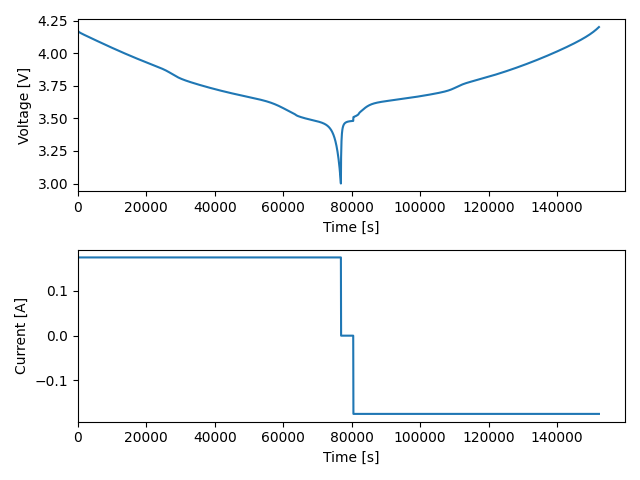

In [20]:
fig,ax = plt.subplots(2,1)
ax1 = ax.flat[0]
ax1.plot(t,Vt)
ax1.set_xlim(left=0)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax2 = ax.flat[1]
ax2.plot(t,I)
ax2.set_xlim(left=0)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Current [A]')
fig.tight_layout()

In [18]:
c_rate_d = "C/20"
c_rate_c = "C/20"


experiment = pybamm.Experiment(
    [
        ("Discharge at "+c_rate_d+" until 3V",
        "Rest for 1 hr",
        "Charge at "+c_rate_c+" until 4.2V")
    ] ,
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)

sim_1 = pybamm.Simulation(spme, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_1 = sim_1.solve(initial_soc=1)

t = sol_1["Time [s]"].entries
I = sol_1["Current [A]"].entries
Q = sol_1['Discharge capacity [A.h]'].entries
Vt = sol_1["Terminal voltage [V]"].entries

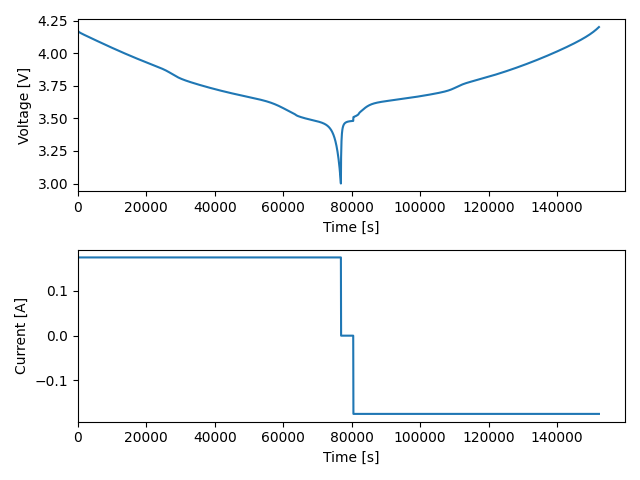

In [21]:
fig,ax = plt.subplots(2,1)
ax1 = ax.flat[0]
ax1.plot(t,Vt)
ax1.set_xlim(left=0)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax2 = ax.flat[1]
ax2.plot(t,I)
ax2.set_xlim(left=0)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Current [A]')
fig.tight_layout()

# Alternatively, you can update parameters in the script, on the fly, instead of updating in the inputs folder. But this change will be valid only in this script.

In [22]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)

c_rate_d = "C/3"
c_rate_c = "C/3"

parameter_values.update(
    {
        "Negative electrode conductivity [S.m-1]": 100,
        "Maximum concentration in negative electrode [mol.m-3]": 28746,
        "Negative electrode diffusion coefficient [m2.s-1]": 5.0E-15,
    },
    check_already_exists=False,
)

experiment = pybamm.Experiment(
    [
        ("Discharge at "+c_rate_d+" until 3V",
        "Rest for 10 sec",
        "Charge at "+c_rate_c+" until 4.2V", 
        "Hold at 4.2V until C/20")
    ] ,
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)

sim_0 = pybamm.Simulation(spme, experiment=experiment, parameter_values=parameter_values, 
                            solver=pybamm.CasadiSolver("safe"))
sol_0 = sim_0.solve(initial_soc=1)

t = sol_0["Time [s]"].entries
I = sol_0["Current [A]"].entries
Q = sol_0['Discharge capacity [A.h]'].entries
Vt = sol_0["Terminal voltage [V]"].entries

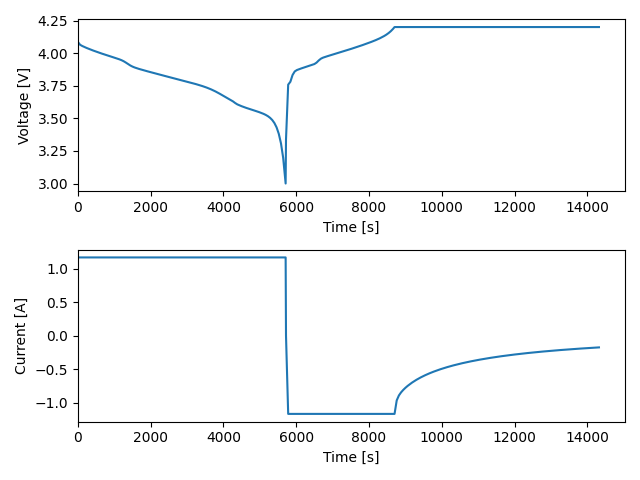

In [23]:
fig,ax = plt.subplots(2,1)
ax1 = ax.flat[0]
ax1.plot(t,Vt)
ax1.set_xlim(left=0)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax2 = ax.flat[1]
ax2.plot(t,I)
ax2.set_xlim(left=0)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Current [A]')
fig.tight_layout()